In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
t = [30.0086+273, 39.9674+273, 50.0081+273, 60.0009+273, 70.0178+273, 80.0307+273, 90.0584+273, 100.5400+273, 110.1460+273]
p = [93.5374, 109.068, 124.963, 145.061, 164.592, 187.052, 209.563, 232.933, 256.980]
p_e = [0.2417, 0.243, 0.080, 0.173, 0.411, 0.262, 0.443, 0.152, 0.084]
t4=[]
for i in range(9):
    t4.append(t[i]**4)

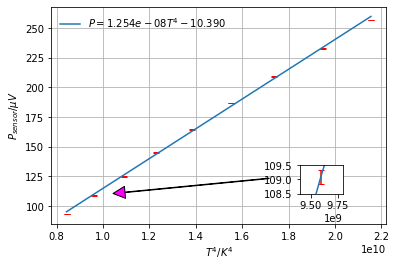

In [3]:
big_ax=plt.axes()
big_ax.errorbar(t4, p, yerr = p_e, capsize=3, ecolor='r', ls = 'none')
poly = np.polyfit(t4, p, 1)
big_ax.plot(t4, np.polyval(poly, t4), label = r'$P = {:.3e}T^4{:.3f}$'.format(poly[0], poly[1]))

big_ax.annotate('', fontsize = 7.8, xytext = (1.8e10, 125), xy=(t4[1], p[1]),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'magenta'})
small_ax=plt.axes([0.7,0.23,0.1,0.1])
small_ax.errorbar(t4[:3],p[:3], yerr = p_e[:3], capsize=3, ecolor='r')



small_ax.set_ylim(108.5, 109.5)
small_ax.set_xlim(0.94e10, 0.98e10)

big_ax.grid()
big_ax.legend(frameon = False)
big_ax.set_xlabel(r'$T^4/K^4$')
big_ax.set_ylabel(r'$P_{sensor}/ \mu V$')
plt.show()

In [4]:
f = np.poly1d(poly)

In [5]:
R_2, ssr, sst = 0, 0, 0
for i in range(9):
    ssr += (f(t4[i]) - 169.305)**2
    sst += (p[i] - 169.305)**2
R_2 = ssr/sst
R_2

0.9988668868449219

$(\frac{\Delta U}{\alpha}+P_{base})\frac{2\pi r^2}{A_{sensor}}$

In [6]:
def P_test(u, r):
    return u/(10**6*130)*2*np.pi*r**2/0.5

In [7]:
p_t=[]
for i in range(9):
    p_t.append(P_test(p[i], 249.6))
p_t

[0.5633015777702564,
 0.6568300645971162,
 0.7525530436264481,
 0.8735873583500413,
 0.9912070817487124,
 1.126465849222685,
 1.2620317492496929,
 1.4027707250229222,
 1.5475867348825225]

$Newton \ law \ of \ cooling:\Phi=Ah\Delta T$

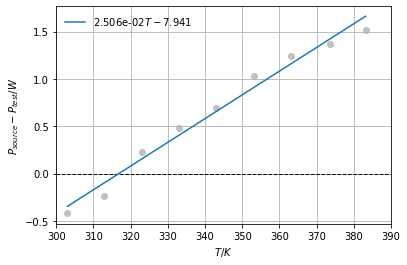

In [13]:
d_p = []
for i in range(9):
    d_p.append(P[i]*10/12 - p_t[i])
plt.scatter(t, d_p, c = 'silver')
polyq = np.polyfit(t, d_p, 1)
plt.plot(t, np.polyval(polyq, t), label = '{:.3e}$T{:.3f}$'.format(polyq[0], polyq[1]))

plt.xlim(300, 390)
plt.hlines(0, 300, 390,  ls = '--', lw = 1)
plt.ylabel(r'$P_{source}-P_{test}/W$')
plt.xlabel(r'$T/K$')
plt.legend(frameon = False)
plt.grid()
plt.show()

In [16]:
fq, ssr, sst, sum = np.poly1d(polyq), 0, 0, 0
for i in range(9):
    sum +=d_p[i]
for i in range(9):
    ssr += (fq(t[i]) - sum/9)**2
    sst += (d_p[i] - sum/9)**2
R_2 = ssr/sst
R_2

0.978996011558478

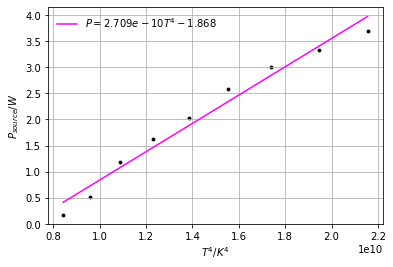

In [12]:
P = [0.181, 0.508, 1.183, 1.632, 2.018, 2.588, 3.004, 3.327, 3.682]
plt.scatter(t4, P, s = 8, c = 'k')
polyp = np.polyfit(t4, P,1)
plt.plot(t4, np.polyval(polyp, t4), c = 'magenta', label = r'$P = {:.3e}T^4{:.3f}$'.format(polyp[0], polyp[1]))

plt.ylabel(r'$P_{source}/W$')
plt.ylim(0,)
plt.xlabel(r'$T^4/K^4$')
plt.legend(frameon = False)
plt.grid()
plt.show()

In [20]:
f = np.poly1d(polyp)

In [21]:
R_2, ssr, sst = 0, 0, 0
for i in range(9):
    ssr += (f(t4[i]) - 2.014)**2
    sst += (P[i] - 2.014)**2
R_2 = ssr/sst
R_2

0.972291631661595

In [22]:
x = [1/(100.3**3), 1/(150.5**3), 1/(200.4**3), 1/(250.2**3), 1/(300.5**3), 1/(350.2**3), 1/(400.6**3), 1/(450.4**3), 1/(497.6**3)]
p_s = [560.835, 320.580, 227.041, 185.835, 159.998, 144.085, 133.097, 127.377, 124.938]
p_s_e = [0.168, 0.418, 0.619, 0.059, 0.164, 0.074, 0.346, 0.361, 0.238]

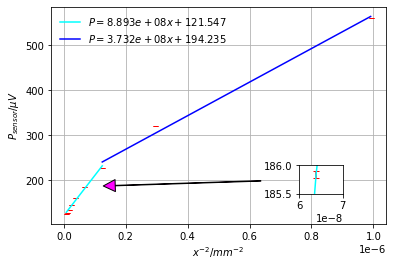

In [23]:
big_ax=plt.axes()
big_ax.errorbar(x, p_s, yerr = p_s_e, capsize=2.5, ecolor='r', ls = 'none')
poly1 = np.polyfit(x[2:], p_s[2:], 1)
big_ax.plot(x[2:], np.polyval(poly1, x[2:]), c = 'cyan', label = r'$P = {:.3e}x+{:.3f}$'.format(poly1[0], poly1[1]))

poly2 = np.polyfit(x[:3], p_s[:3], 1)
big_ax.plot(x[:3], np.polyval(poly2, x[:3]), c = 'blue', label = r'$P = {:.3e}x+{:.3f}$'.format(poly2[0], poly2[1]))

big_ax.annotate('', fontsize = 7.8, xytext = (0.7e-6, 200), xy=(x[3], p_s[3]),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'magenta'})
small_ax=plt.axes([0.7,0.23,0.1,0.1])
small_ax.errorbar(x[2:5],p_s[2:5], yerr = p_s_e[2:5], capsize=3, ecolor='r' , c = 'cyan')


big_ax.ticklabel_format(style='sci',scilimits=(0,0), axis = 'x')
small_ax.set_ylim(185.5, 186)
small_ax.set_xlim(0.6e-7, 0.7e-7)

big_ax.grid()
big_ax.legend(frameon = False)
big_ax.set_xlabel(r'$x^{-2}/mm^{-2}$')
big_ax.set_ylabel(r'$P_{sensor}/ \mu V$')
plt.show()

In [27]:
fx, sst, ssr,  sum = np.poly1d(poly1), 0, 0, 0
for i in range(2,9):
    sum +=p_s[i]
for i in range(2,9):
    ssr += (fx(x[i]) - sum/7)**2
    sst += (p_s[i] - sum/7)**2
R_2 = ssr/sst
R_2

0.9818653513471043

In [28]:
fc, sst, ssr,  sum = np.poly1d(poly2), 0, 0, 0
for i in range(2):
    sum +=p_s[i]
for i in range(2):
    ssr += (fc(x[i]) - sum/7)**2
    sst += (p_s[i] - sum/7)**2
R_2 = ssr/sst
R_2

0.9849922003812711